<a href="https://colab.research.google.com/github/Khair1212/Hybrid_Product_Recommendation-LightFM/blob/main/ValueBase_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analytics in Retail Industry**

### **Introduction**
with the growth of retail market, there's also growing thecompetency and proper optimization, marketing, customer analysis, future prediction and making decisions could lead a major role in the retail industry.


Ideally, a retailer's customer data reflects the company's success. Retailers usually builts reports summurizing customer bahaviours, metrics or make segmentation for proper marketing strategy and also future prediction. 

### **Problem Statement**
We can define several problems here: \\
1. Analyzing transactions data, customer data as well as product data for understanding the business well and making proper decisions.
2. Knowing about the customer, whom are generating maximum profit, whom are hibernating, whom still can't trust.
3. Recommend product according to customer bahaviour, content and collaborative recommendation system
4. Future sales prediction

We have tried to solve all of these problems in retail industry. 

### **RFM Segmentation**

RFM segmentation allows marketers to target specific clusters of customers with communications that are much more relevant for their particular behavior – and thus generate much higher rates of response, plus increased loyalty and customer lifetime value. Like other segmentation methods, RFM segmentation is a powerful way to identify groups of customers for special treatment. RFM stands for recency, frequency and monetary – more about each of these shortly.

**Recency:** How much time has elapsed since a customer’s last activity or transaction with the brand? Activity is usually a purchase, although variations are sometimes used, e.g., the last visit to a website or use of a mobile app. In most cases, the more recently a customer has interacted or transacted with a brand, the more likely that customer will be responsive to communications from the brand.

**Frequency:** How often has a customer transacted or interacted with the brand during a particular period of time? Clearly, customers with frequent activities are more engaged, and probably more loyal, than customers who rarely do so. And one-time-only customers are in a class of their own.

**Monetary:** Also referred to as “monetary value,” this factor reflects how much a customer has spent with the brand during a particular period of time. Big spenders should usually be treated differently than customers who spend little. Looking at monetary divided by frequency indicates the average purchase amount – an important secondary factor to consider when segmenting customers.
### **Recommendation System**

Let us have some idea about recommendation system: \\
By definition, A recommendation system is a system that identifies and provides recommended content or digital items for users by using users interests. Recommender systems have become an important feature in modern websites, e.g. in Amazon, Netflix, or Flickr

Types of recommendation system:
1. **Collaborative Filtering:** Collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person. 
2. **Content-Based Filtering:** These filtering methods are based on the description of an item and a profile of the user’s preferred choices. In a content-based recommendation system, keywords are used to describe the items; besides, a user profile is built to state the type of item this user likes. In other words, the algorithms try to recommend products which are similar to the ones that a user has liked in the past. The idea of content-based filtering is that if you like an item you will also like a ‘similar’ item.
3. **Hybrid Recommendation:** Hybrid recommendation is the combination of content based and collaborative filtering. It can provide more accurate results than pure recommendations.

Types of Data for building recommendation systems: There are two kinds of data available for building a recommendation system. There are

1. **Explicit feedback:** Explicit feedback is the data about user explicit feedback(ratings etc) about a product. It tells directly that users like a product or not.

2. **Implicit feedback:** In implicit feedback, we don't have the data about how the user rates a product. Examples for implicit feedback are clicks, watched movies, played songs, purchases or assigned tags.

As our dataset doesn't have any ratings or similar matrix so, we are using implicit feedback data.

### **Algorithms Used**
For clustering purpose we applied K-Means Clustering Algorithm

**K-Means Clustering:** k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

We applied LightFM algorithm and create a hybrid recommendation system. 

**LightFM:** LightFM is a hybrid matrix factorisation model representing users and items as linear combinations of their content features’ latent factors. The model outperforms both collaborative and content-based models in cold-start or sparse interaction data scenarios (using both user and item metadata), and performs at least as well as a pure collaborative matrix factorisation model where interaction data is abundant.


### **Dataset Overview**
Source: https://www.kaggle.com/darpan25bajaj/retail-case-study-data#prod_cat_info.csv 

**Data Schema** \\
The dataset has three sheets (Customer, Transaction, Product Hierarchy):

**Customer:** Customer information including demographics \\
**Transaction:** Transaction of customers \\
**Product Hierarchy:** Product information \\


In [ ]:
# install the lightfm algorithm
!pip install lightfm

     |████████████████████████████████| 317kB 16.5MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705344 sha256=e27821c0854de3945e408e894e1e94a94dd742d220f56392b0ce6935df224398
  Stored in directory: /root/.cache/pip/wheels/c6/64/d4/673c7277f71ac4c5ad4835b94708c01b653ef2d3aa78ef20aa
Successfully built lightfm


In [ ]:
#import necessary packages

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import scipy.sparse as sparse
from scipy.sparse import csr_matrix
import os

from sklearn import preprocessing 
import keras as ks
import tensorflow

from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import auc_score, precision_at_k, recall_at_k
from lightfm import LightFM




# 1) Data Onboarding and Preprocessing

## i) Extract data from bigquery
We've extracted our data from datastudio. We have run some simple sql queries to extract our dataset from bigquery.

In [ ]:
from google.colab import auth 
auth.authenticate_user() 
os.environ["PROJECT_ID"] = 'innate-portal-294200' # bigquery project id
 
import pandas_gbq 

#write queries to fetch the data from bigqueries
transaction_data = 'SELECT * FROM `innate-portal-294200.ValueBase_Capstone.Transactions`'  
customer_info_data = 'SELECT * FROM `innate-portal-294200.ValueBase_Capstone.Customer_info`' 
product_info_data = 'SELECT * FROM `innate-portal-294200.ValueBase_Capstone.Product_cat_info`' 
tran_df = pandas_gbq.read_gbq(transaction_data,project_id = "innate-portal-294200") 
cust_df = pandas_gbq.read_gbq(customer_info_data,project_id = "innate-portal-294200")  
prod_df = pandas_gbq.read_gbq(product_info_data,project_id = "innate-portal-294200")  

Downloading: 100%|██████████| 23/23 [00:00<00:00, 54.76rows/s]


In [ ]:
tran_df.head() 

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,44016331022,269430,27-04-2012,4,1,1,100,10.5,110.5,e-Shop
1,97507207511,268867,30-03-2012,10,6,1,100,10.5,110.5,MBR
2,84441368903,267814,11/3/2012,3,5,1,100,10.5,110.5,Flagship store
3,23151091056,269500,23-11-2013,4,3,1,400,42.0,442.0,e-Shop
4,2820688369,269972,10/11/2013,1,1,1,400,42.0,442.0,Flagship store


In [ ]:
cust_df.head()

,customer_Id,DOB,Gender,city_code
0,267199,1970-02-14,None,2.0
1,271626,1970-06-02,None,6.0
2,268709,1970-09-09,F,NaN
3,270324,1970-02-01,F,1.0
4,272028,1970-02-20,F,1.0


In [ ]:
prod_df.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


## ii) Check the datatype, shape and missing elements
Let's check for any mismatch in datatype, any missing instances and also their shape.

In [ ]:
tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   object        
 3   city_code    5645 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB


In [ ]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [ ]:
print(tran_df.shape)
print(cust_df.shape)
print(prod_df.shape) 

(23053, 10)
(5647, 4)
(23, 4)


### Missing Elements 
Gender and City Code information are missing in 2 of the customer. We are not removing them now. We will take action while we use them in recommendation.

In [ ]:
cust_df.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

## iii) Rename the column name for more clarity and merging issues

In [ ]:
tran_df.columns = ['Transaction ID', 'Customer ID', 'Transaction Date', 'Prod Subcat Code',
       'Prod Cat Code', 'Qty', 'Rate', 'Tax', 'Total Amt', 'Store Type']
cust_df.columns = ['Customer ID', 'DOB', 'Gender', 'City Code']

prod_df.columns = ['Prod Cat Code', 'Prod Cat', 'Prod Subcat Code', 'Prod Subcat']

# 2) EDA (Exploratory Data Analysis) 

## i) [Transactional Data]

In [ ]:
#first make a copy, we don't want to ruin our main dataframe
tran_df2 = tran_df.copy()
cust_df2 = cust_df.copy()
prod_df2 = prod_df.copy()

In [ ]:
tran_df2.head()

,Transaction ID,Customer ID,Transaction Date,Prod Subcat Code,Prod Cat Code,Qty,Rate,Tax,Total Amt,Store Type
0,44016331022,269430,27-04-2012,4,1,1,100,10.5,110.5,e-Shop
1,97507207511,268867,30-03-2012,10,6,1,100,10.5,110.5,MBR
2,84441368903,267814,11/3/2012,3,5,1,100,10.5,110.5,Flagship store
3,23151091056,269500,23-11-2013,4,3,1,400,42.0,442.0,e-Shop
4,2820688369,269972,10/11/2013,1,1,1,400,42.0,442.0,Flagship store


### Feature Enginerring
1. Remove inappropriate rows (Total amount can't be negative).
2. Convert Transaction Date to date time format.
3. Calculate netsales (without Tax)

In [ ]:
# Remove inappropriate rows
tran_df2 = tran_df2[tran_df2['Total Amt'] > 0] 

In [ ]:
tran_df2 

,Transaction ID,Customer ID,Transaction Date,Prod Subcat Code,Prod Cat Code,Qty,Rate,Tax,Total Amt,Store Type
0,44016331022,269430,27-04-2012,4,1,1,100,10.500,110.500,e-Shop
1,97507207511,268867,30-03-2012,10,6,1,100,10.500,110.500,MBR
2,84441368903,267814,11/3/2012,3,5,1,100,10.500,110.500,Flagship store
3,23151091056,269500,23-11-2013,4,3,1,400,42.000,442.000,e-Shop
4,2820688369,269972,10/11/2013,1,1,1,400,42.000,442.000,Flagship store
...,...,...,...,...,...,...,...,...,...,...
20871,46591907261,273248,25-08-2011,10,5,5,792,415.800,4375.800,MBR
20872,51141103524,271459,28-06-2011,5,3,5,792,415.800,4375.800,Flagship store
20873,57159189042,267143,31-03-2013,10,6,5,1219,639.975,6734.975,Flagship store
20874,21904499602,268544,15-01-2013,1,1,5,1219,639.975,6734.975,e-Shop


In [ ]:
tran_df2.head() 

,Transaction ID,Customer ID,Transaction Date,Prod Subcat Code,Prod Cat Code,Qty,Rate,Tax,Total Amt,Store Type
0,44016331022,269430,27-04-2012,4,1,1,100,10.5,110.5,e-Shop
1,97507207511,268867,30-03-2012,10,6,1,100,10.5,110.5,MBR
2,84441368903,267814,11/3/2012,3,5,1,100,10.5,110.5,Flagship store
3,23151091056,269500,23-11-2013,4,3,1,400,42.0,442.0,e-Shop
4,2820688369,269972,10/11/2013,1,1,1,400,42.0,442.0,Flagship store


In [ ]:
#convert date to datetime format 
tran_df2['Transaction Date'] = pd.to_datetime(tran_df2['Transaction Date'],dayfirst = True)  

In [ ]:
#Calculate netsales (without Tax)
tran_df2['Net_Sales'] = tran_df2['Qty'] * tran_df2['Rate']  

In [ ]:
tran_df2.head()

,Transaction ID,Customer ID,Transaction Date,Prod Subcat Code,Prod Cat Code,Qty,Rate,Tax,Total Amt,Store Type,Net_Sales
0,44016331022,269430,2012-04-27,4,1,1,100,10.5,110.5,e-Shop,100
1,97507207511,268867,2012-03-30,10,6,1,100,10.5,110.5,MBR,100
2,84441368903,267814,2012-03-11,3,5,1,100,10.5,110.5,Flagship store,100
3,23151091056,269500,2013-11-23,4,3,1,400,42.0,442.0,e-Shop,400
4,2820688369,269972,2013-11-10,1,1,1,400,42.0,442.0,Flagship store,400


## ii) [Product Data]

In [ ]:
prod_df2.head() 

,Prod Cat Code,Prod Cat,Prod Subcat Code,Prod Subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [ ]:
prod_df2.groupby('Prod Cat Code')['Prod Cat'].value_counts()  

Prod Cat Code  Prod Cat        
1              Clothing            3
2              Footwear            3
3              Electronics         5
4              Bags                2
5              Books               6
6              Home and kitchen    4
Name: Prod Cat, dtype: int64

In [ ]:
prod_df2.groupby('Prod Subcat Code')['Prod Subcat'].value_counts() 

Prod Subcat Code  Prod Subcat        
1                 Mens                   2
                  Women                  1
2                 Furnishing             1
3                 Comics                 1
                  Kids                   1
                  Women                  1
4                 Kids                   1
                  Mens                   1
                  Mobiles                1
                  Women                  1
5                 Computers              1
6                 DIY                    1
7                 Fiction                1
8                 Personal Appliances    1
9                 Cameras                1
10                Audio and video        1
                  Kitchen                1
                  Non-Fiction            1
11                Bath                   1
                  Children               1
12                Academic               1
                  Tools                  1
Name: Prod Subca

### Feature Engineering
1. Merge Prod_Cat_Code and Prod_subcat_code to 'Product Code'
2. Merge Prod_Cat and Prod_Subcat to 'Product Info'

In [ ]:
#merge 'Prod Cat' with 'Prod Subcat'
prod_df2['Product Info'] = prod_df2['Prod Cat'].astype(str) + '_'+ prod_df2['Prod Subcat'].astype(str)

In [ ]:
#merge 'Prod Cat Code' and 'Prod Subcat Code'
prod_df2['Product Code'] = prod_df2['Prod Cat Code'].astype(str) + '_'+ prod_df2['Prod Subcat Code'].astype(str)  

In [ ]:
prod_df2.head()

,Prod Cat Code,Prod Cat,Prod Subcat Code,Prod Subcat,Product Info,Product Code
0,1,Clothing,4,Mens,Clothing_Mens,1_4
1,1,Clothing,1,Women,Clothing_Women,1_1
2,1,Clothing,3,Kids,Clothing_Kids,1_3
3,2,Footwear,1,Mens,Footwear_Mens,2_1
4,2,Footwear,3,Women,Footwear_Women,2_3


# 3) RFM

In [ ]:
tran_df2.shape

(20876, 11)

In [ ]:
tran_df2.head()

,Transaction ID,Customer ID,Transaction Date,Prod Subcat Code,Prod Cat Code,Qty,Rate,Tax,Total Amt,Store Type,Net_Sales
0,44016331022,269430,2012-04-27,4,1,1,100,10.5,110.5,e-Shop,100
1,97507207511,268867,2012-03-30,10,6,1,100,10.5,110.5,MBR,100
2,84441368903,267814,2012-03-11,3,5,1,100,10.5,110.5,Flagship store,100
3,23151091056,269500,2013-11-23,4,3,1,400,42.0,442.0,e-Shop,400
4,2820688369,269972,2013-11-10,1,1,1,400,42.0,442.0,Flagship store,400


In [ ]:
#check the unique items of each feature
for i in tran_df2.columns: 
  print(i, ':', tran_df2[i].nunique()) 

Transaction ID : 20876
Customer ID : 5506
Transaction Date : 1123
Prod Subcat Code : 12
Prod Cat Code : 6
Qty : 5
Rate : 1431
Tax : 4194
Total Amt : 4194
Store Type : 4
Net_Sales : 4194


In [ ]:
tran_df2['Transaction Date'].max() 

Timestamp('2014-02-20 00:00:00')

In [ ]:
#Fix Today (Now sohuld be the max date)
import datetime as dt 

Now = dt.datetime(2014,2,20) #YYYY-MM-DD 

## i) Compute Recency 
Recency means the the duration between today and the last purchase from a customer 

In [ ]:
#Recency 
RFM = tran_df2.groupby('Customer ID').agg({'Transaction Date':lambda x: (Now - x.max()).days}) 


## ii) Compute Frequency
Frequency means how frequently a customer buy product. in other words, how many transactions a customer has made.

In [ ]:
#Frequency
RFM['Frequency'] = tran_df2.groupby('Customer ID').agg({'Transaction ID':lambda x: len(x)}) 


## iii) Compute Monetary Value
How much money a customer paid so far, sum of net sales

In [ ]:
#Monetary
RFM['Monetary'] = tran_df2.groupby('Customer ID').agg({'Net_Sales':lambda x: sum(x)})


In [ ]:
#rename the column name 
RFM = RFM.rename(columns = {'Transaction Date': 'Recency'})                     

In [ ]:
RFM = RFM.drop_duplicates()

In [ ]:
print(RFM['Frequency'].max())
print(RFM['Monetary'].max())
print(RFM['Recency'].max())

11
40695
1121


In [ ]:
#normalization
RFM['recency_normalized']=pd.qcut(RFM['Recency'],5,labels=False)
RFM['recency_normalized']= RFM['recency_normalized']+1
RFM['frequency_normalized']=pd.qcut(RFM['Frequency'],5,labels=False)
RFM['frequency_normalized']=RFM['frequency_normalized']+1
RFM['monetary_value_normalized']=pd.qcut(RFM['Monetary'],5,labels=False)
RFM['monetary_value_normalized']=RFM['monetary_value_normalized']+1 

In [ ]:
RFM

,Recency,Frequency,Monetary,recency_normalized,frequency_normalized,monetary_value_normalized
Customer ID,,,,,,
266783,365,4,8102,4,3,3
266784,443,3,5153,4,2,2
266785,203,7,25740,3,5,5
266788,373,4,5514,4,3,2
266794,8,11,25446,1,5,5
...,...,...,...,...,...,...
275257,171,4,12421,3,3,4
275261,138,3,3353,2,2,1
275262,722,2,4596,5,1,2


In [ ]:
RFM_Array  = np.array(RFM.iloc[:,3:6]) 
RFM_NORM = preprocessing.normalize(RFM_Array)

## iv) Elbow Method for finding perfect k

From the plot we find k = 5 is an optimal number for the Clustering approach

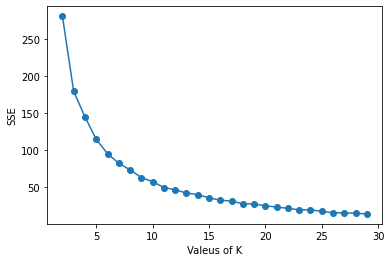

In [ ]:
# Elbow method
import matplotlib.pyplot as plt

Ks = range(2,30)

results = []

for k in Ks:
  model = KMeans(n_clusters= k)
  model.fit(RFM_NORM)

  results.append(model.inertia_)

plt.plot(Ks, results, 'o-')
plt.xlabel('Valeus of K')
plt.ylabel('SSE')
plt.show() 

In [ ]:
from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 5) 

# Training our model 
kmeans.fit(RFM_NORM)  

# You can see the labels (clusters) assigned for each data point with the function labels_ 
kmeans.labels_ 

# Assigning the labels to the initial dataset 
RFM['Cluster'] = kmeans.labels_ 

In [ ]:
RFM

,Recency,Frequency,Monetary,recency_normalized,frequency_normalized,monetary_value_normalized,Cluster
Customer ID,,,,,,,
266783,365,4,8102,4,3,3,0
266784,443,3,5153,4,2,2,0
266785,203,7,25740,3,5,5,2
266788,373,4,5514,4,3,2,4
266794,8,11,25446,1,5,5,2
...,...,...,...,...,...,...,...
275257,171,4,12421,3,3,4,1
275261,138,3,3353,2,2,1,4
275262,722,2,4596,5,1,2,3


## iv) Plot Clusters
A 3d scatter plot by plotly. 
Ref: https://plotly.com/python/3d-charts/

In [ ]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(RFM.Cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = RFM[RFM.Cluster == C]['recency_normalized'],
                                y = RFM[RFM.Cluster == C]['frequency_normalized'],
                                z = RFM[RFM.Cluster == C]['monetary_value_normalized'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'RFM Segment ' + str(C)))

In [ ]:
PLOT.update_layout(width = 1000, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary Value', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [ ]:
RFM['Cluster']

Customer ID
266783    3
266784    3
266785    6
266788    3
266794    1
         ..
275257    6
275261    3
275262    5
275264    0
275265    0
Name: Cluster, Length: 5506, dtype: int32

In [ ]:
#Let's see the average of each segment for monetary, frequency and recency. This will help us in naming the clusters

print("Mean Monetary by segment: ",RFM.groupby("Cluster")["Monetary"].mean())
print("Mean frequency by segment: ",RFM.groupby("Cluster")["Frequency"].mean())
print("Recency by segment: ",RFM.groupby("Cluster")["Recency"].mean())

Mean Monetary by segment:  Cluster
0    11725.868538
1     3318.348918
2     9628.717538
3     7636.463007
4    13395.398050
Name: Monetary, dtype: float64
Mean frequency by segment:  Cluster
0    3.446086
1    1.786147
2    4.725126
3    3.093079
4    5.676686
Name: Frequency, dtype: float64
Recency by segment:  Cluster
0    133.494830
1    573.260606
2    204.677066
3    356.416866
4     56.689683
Name: Recency, dtype: float64


## v) Let's Name The Clusters

**Cluster 4: Champions** (They are the champions) [avg. monetary: 13395.40(highest), avg. frequency: 5.67 (highest), avg. recency: 56.68 (lowest) ]
 
**Cluster 0: Loyal customer** (Up-sell higher value products) [avg. monetary: 11725.87, avg. frequency: 3.45, avg. recency: 133.49]

**Cluster 2: Potential Loyalist** (Up-sell lower value products) [avg. monetary: 9628.71, avg. frequency: 4.72, avg. recency: 204.67]

**Cluster 3: About to Sleep** (Win them back. Talk to them. Make them special offers. Make them feel valuable) [avg. monetary: 7636.47, avg. frequency: 3.09, avg. recency: 356.42]

**Cluster 1: Hibernating** (they are losing, promote to get them back) [avg. monetary: 3318.34, avg. frequency: 1.78, avg. recency: 573.26]

In [ ]:
RFM['Cluster'] = RFM['Cluster'].replace({4:"Champions",0:"Loyal Customer",2:"Protential Customer",3:"About to Sleep",1:"Hibernating"})

In [ ]:
RFM

,Recency,Frequency,Monetary,recency_normalized,frequency_normalized,monetary_value_normalized,Cluster
Customer ID,,,,,,,
266783,365,4,8102,4,3,3,About to Sleep
266784,443,3,5153,4,2,2,About to Sleep
266785,203,7,25740,3,5,5,Protential Customer
266788,373,4,5514,4,3,2,About to Sleep
266794,8,11,25446,1,5,5,Champions
...,...,...,...,...,...,...,...
275257,171,4,12421,3,3,4,Loyal Customer
275261,138,3,3353,2,2,1,Protential Customer
275262,722,2,4596,5,1,2,Hibernating


In [ ]:
#drop irrelavant columns
RFM.drop(["recency_normalized","frequency_normalized","monetary_value_normalized"],axis=1,inplace=True)

In [ ]:
RFM = RFM.reset_index()
RFM

,Customer ID,Recency,Frequency,Monetary,Cluster
0,266783,365,4,8102,About to Sleep
1,266784,443,3,5153,About to Sleep
2,266785,203,7,25740,Protential Customer
3,266788,373,4,5514,About to Sleep
4,266794,8,11,25446,Champions
...,...,...,...,...,...
5501,275257,171,4,12421,Loyal Customer
5502,275261,138,3,3353,Protential Customer
5503,275262,722,2,4596,Hibernating
5504,275264,866,2,3453,Hibernating


### Upload Customer Cluster Data to Bigquery
For further analyzing and visualization we will upload the processed cluster dataset to bigquery


In [ ]:
cluster_data = RFM.copy()
cluster_data = cluster_data.rename({'Customer ID':'Customer_ID'},axis =1 )

In [ ]:
pandas_gbq.to_gbq(cluster_data, destination_table = 'ValueBase_Capstone.cluster_data', project_id='innate-portal-294200', if_exists = 'replace') 
#cluster_data = cluster_data.to_csv('customer_cluster.csv', index=False) 

1it [00:06,  6.31s/it]


# 4) Recommendation


In [ ]:
rm_df = RFM.copy() 

In [ ]:
rm_df.set_index('Customer ID', inplace = True)
rm_df.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
266783,365,4,8102,About to Sleep
266784,443,3,5153,About to Sleep
266785,203,7,25740,Protential Customer
266788,373,4,5514,About to Sleep
266794,8,11,25446,Champions


In [ ]:
rm_df.shape

(5506, 4)

## i) Merge Cluster, Customer Features and Product Features
1. Merge cluster from RFM data to transactional data
2. Merge Gender, City from Customer data to transactional data
3. Merge Product info from Customer data to transactional data (No common feature available so, first merge prod cat code, prod subcat code in transactional data then merge from product data) 

In [ ]:
tran_df2

,Transaction ID,Customer ID,Transaction Date,Prod Subcat Code,Prod Cat Code,Qty,Rate,Tax,Total Amt,Store Type,Net_Sales
0,44016331022,269430,2012-04-27,4,1,1,100,10.500,110.500,e-Shop,100
1,97507207511,268867,2012-03-30,10,6,1,100,10.500,110.500,MBR,100
2,84441368903,267814,2012-03-11,3,5,1,100,10.500,110.500,Flagship store,100
3,23151091056,269500,2013-11-23,4,3,1,400,42.000,442.000,e-Shop,400
4,2820688369,269972,2013-11-10,1,1,1,400,42.000,442.000,Flagship store,400
...,...,...,...,...,...,...,...,...,...,...,...
20871,46591907261,273248,2011-08-25,10,5,5,792,415.800,4375.800,MBR,3960
20872,51141103524,271459,2011-06-28,5,3,5,792,415.800,4375.800,Flagship store,3960
20873,57159189042,267143,2013-03-31,10,6,5,1219,639.975,6734.975,Flagship store,6095
20874,21904499602,268544,2013-01-15,1,1,5,1219,639.975,6734.975,e-Shop,6095


In [ ]:
# merge cluster
rm_df2 = tran_df2.merge(rm_df['Cluster'], how = 'left', on = 'Customer ID')


#merge customer's features [Gender and City]
rm_df2 = rm_df2.merge(cust_df2[['Customer ID','City Code', 'Gender']], how='left', on = 'Customer ID')



In [ ]:
#merge 'Prod Cat Code' and 'Prod Subcat Code' of transactional data
rm_df2['Product Code'] = rm_df2['Prod Cat Code'].astype(str) + '_'+ rm_df2['Prod Subcat Code'].astype(str)


In [ ]:
#merge product features [Product Info]
rm_df2 = rm_df2.merge(prod_df2[['Product Code','Product Info']], how='left', on = 'Product Code')


In [ ]:
#again check the unique items of each feature
for i in rm_df2.columns: 
  print(i, ':', rm_df2[i].nunique()) 

Transaction ID : 20876
Customer ID : 5506
Transaction Date : 1123
Prod Subcat Code : 12
Prod Cat Code : 6
Qty : 5
Rate : 1431
Tax : 4194
Total Amt : 4194
Store Type : 4
Net_Sales : 4194
Cluster : 5
City Code : 10
Gender : 2
Product Code : 23
Product Info : 23


In [ ]:
rm_df2.isnull().sum()

Transaction ID      0
Customer ID         0
Transaction Date    0
Prod Subcat Code    0
Prod Cat Code       0
Qty                 0
Rate                0
Tax                 0
Total Amt           0
Store Type          0
Net_Sales           0
Cluster             0
City Code           8
Gender              8
Product Code        0
Product Info        0
dtype: int64

### Upload Merged data to BigQuery
For further analyzing and visualization we will upload the merged dataset to bigquery

In [ ]:
merged_data = rm_df2.copy()
merged_data = merged_data.rename({'Transaction ID': 'Transaction_ID', 'Customer ID': 'Customer_ID', 'Transaction Date':'Transaction_Date', 'Prod Subcat Code': 'Prod_subcat_code', 'Prod Cat Code':'Prod_cat_code', 'Total Amt':'Total_amt', 'Store Type':'Store_Type', 'City Code':'City_Code', 'Product Code': 'Product_code', 'Product Info':'Product_info'}, axis =1)


In [ ]:
pandas_gbq.to_gbq(merged_data, destination_table = 'ValueBase_Capstone.merged_data', project_id='innate-portal-294200', if_exists = 'replace') 
#merged_data.to_csv('merged_data.csv')

1it [00:05,  5.66s/it]


In [ ]:
# Now we will remove the missing elements. We didn't remove before because removing at the very beginning could loss some data while we merge them. 

rm_df2 = rm_df2.dropna()

## ii) Interaction Matrix
Getting the customer's transaction for every material in terms of sales quantity

In [ ]:
#Keep only essential columns
final_rm_df = rm_df2.copy() 
final_rm_df = final_rm_df[['Product Info','Product Code','Store Type', 'Qty', 'Customer ID', 'Gender', 'City Code', 'Cluster']]

In [ ]:
#merge product info and store type for differenciating materials
final_rm_df['Material'] = final_rm_df['Product Info'].astype(str) + '_'+ final_rm_df['Store Type'].astype(str)


In [ ]:
#Interacion Matrix

interactions = final_rm_df.groupby(['Customer ID', 'Material'])['Qty'].sum().unstack()  

In [ ]:
interactions = interactions.fillna(0) 

In [ ]:
#feature transformation (Min-max-scaler)
minmaxscaler = preprocessing.MinMaxScaler() 
interactions_scaled = minmaxscaler.fit_transform(interactions) 
interactions_scaled = pd.DataFrame(interactions_scaled) 

In [ ]:
## Re-append the customer ID and the material into the DataFrame's index and column respectively
interactions_scaled.index = interactions.index 
interactions_scaled.columns = interactions.columns 

In [ ]:
interactions_scaled 

Material,Bags_Mens_Flagship store,Bags_Mens_MBR,Bags_Mens_TeleShop,Bags_Mens_e-Shop,Bags_Women_Flagship store,Bags_Women_MBR,Bags_Women_TeleShop,Bags_Women_e-Shop,Books_Academic_Flagship store,Books_Academic_MBR,Books_Academic_TeleShop,Books_Academic_e-Shop,Books_Children_Flagship store,Books_Children_MBR,Books_Children_TeleShop,Books_Children_e-Shop,Books_Comics_Flagship store,Books_Comics_MBR,Books_Comics_TeleShop,Books_Comics_e-Shop,Books_DIY_Flagship store,Books_DIY_MBR,Books_DIY_TeleShop,Books_DIY_e-Shop,Books_Fiction_Flagship store,Books_Fiction_MBR,Books_Fiction_TeleShop,Books_Fiction_e-Shop,Books_Non-Fiction_Flagship store,Books_Non-Fiction_MBR,Books_Non-Fiction_TeleShop,Books_Non-Fiction_e-Shop,Clothing_Kids_Flagship store,Clothing_Kids_MBR,Clothing_Kids_TeleShop,Clothing_Kids_e-Shop,Clothing_Mens_Flagship store,Clothing_Mens_MBR,Clothing_Mens_TeleShop,Clothing_Mens_e-Shop,...,Electronics_Computers_Flagship store,Electronics_Computers_MBR,Electronics_Computers_TeleShop,Electronics_Computers_e-Shop,Electronics_Mobiles_Flagship store,Electronics_Mobiles_MBR,Electronics_Mobiles_TeleShop,Electronics_Mobiles_e-Shop,Electronics_Personal Appliances_Flagship store,Electronics_Personal Appliances_MBR,Electronics_Personal Appliances_TeleShop,Electronics_Personal Appliances_e-Shop,Footwear_Kids_Flagship store,Footwear_Kids_MBR,Footwear_Kids_TeleShop,Footwear_Kids_e-Shop,Footwear_Mens_Flagship store,Footwear_Mens_MBR,Footwear_Mens_TeleShop,Footwear_Mens_e-Shop,Footwear_Women_Flagship store,Footwear_Women_MBR,Footwear_Women_TeleShop,Footwear_Women_e-Shop,Home and kitchen_Bath_Flagship store,Home and kitchen_Bath_MBR,Home and kitchen_Bath_TeleShop,Home and kitchen_Bath_e-Shop,Home and kitchen_Furnishing_Flagship store,Home and kitchen_Furnishing_MBR,Home and kitchen_Furnishing_TeleShop,Home and kitchen_Furnishing_e-Shop,Home and kitchen_Kitchen_Flagship store,Home and kitchen_Kitchen_MBR,Home and kitchen_Kitchen_TeleShop,Home and kitchen_Kitchen_e-Shop,Home and kitchen_Tools_Flagship store,Home and kitchen_Tools_MBR,Home and kitchen_Tools_TeleShop,Home and kitchen_Tools_e-Shop
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
266783,0.0,0.000000,0.000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.428571,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
266784,0.0,0.000000,0.000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.555556,0.0,0.0,0.428571,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
266785,0.0,0.000000,0.375,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
266788,0.0,0.285714,0.000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
266794,0.0,0.000000,0.000,0.222222,0.0,0.375,0.000000,0.0,0.0,0.8,0.0,0.0,0.0,0.000000,0.0,0.3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0

## iii) User Features Matrix
There are three features merged into building the user features matrix
1. Customer's unique categories they buy 
2. Customer info (Gender, City Code) 
3. Cluster they belong to  

In [ ]:
# User Features Matrix 

# Getting the unique categories they buy, grouped them by the quantity per category
cust_qty = final_rm_df.groupby(['Customer ID', 'Product Info'])['Qty'].sum().unstack().fillna(0)


In [ ]:
# Scale with minmaxscaler in the same way as previous
minmaxscaler = preprocessing.MinMaxScaler()
cust_qty_scaled = minmaxscaler.fit_transform(cust_qty)
cust_qty_scaled = pd.DataFrame(cust_qty_scaled)
cust_qty_scaled.index = cust_qty.index
cust_qty_scaled.columns = cust_qty.columns

In [ ]:
final_rm_df['City Code'].unique()

array([ 5.,  4.,  7., 10.,  3.,  9.,  8.,  1.,  2.,  6.])

In [ ]:
#Getting customer cluster 
cust_clus = final_rm_df.groupby(['Customer ID', 'Cluster'])['Cluster'].nunique().unstack().fillna(0)

#Getting customer Gender
cust_gender = final_rm_df.groupby(['Customer ID', 'Gender'])['Gender'].nunique().unstack().fillna(0)

#Getting customer city code
cust_city = final_rm_df.groupby(['Customer ID', 'City Code'])['City Code'].nunique().unstack().fillna(0)

print(cust_gender.shape)
print(cust_clus.shape)
print(cust_city.shape)

(5502, 2)
(5502, 5)
(5502, 10)


In [ ]:
#merge cluster dataframe with gender dataframe
cluster_gender = pd.merge(cust_clus, cust_gender, left_index=True, right_index=True, how='inner')
print(cluster_gender)

#merge cluster_gender dataframe with city dataframe
cluster_gender_city = pd.merge(cluster_gender, cust_city, left_index=True, right_index=True, how='inner')
print(cluster_gender_city)

             About to Sleep  Champions  ...    F    M
Customer ID                             ...          
266783                  1.0        0.0  ...  0.0  1.0
266784                  1.0        0.0  ...  1.0  0.0
266785                  0.0        0.0  ...  1.0  0.0
266788                  1.0        0.0  ...  1.0  0.0
266794                  0.0        1.0  ...  1.0  0.0
...                     ...        ...  ...  ...  ...
275257                  0.0        0.0  ...  0.0  1.0
275261                  0.0        0.0  ...  1.0  0.0
275262                  0.0        0.0  ...  0.0  1.0
275264                  0.0        0.0  ...  0.0  1.0
275265                  0.0        0.0  ...  0.0  1.0

[5502 rows x 7 columns]
             About to Sleep  Champions  Hibernating  ...  8.0  9.0  10.0
Customer ID                                          ...                
266783                  1.0        0.0          0.0  ...  0.0  0.0   0.0
266784                  1.0        0.0          0.0  .

In [ ]:
# Merge the two features to create the user feature matrix
#customer_features = pd.merge(cust_qty_scaled, cust_gender, left_index=True, right_index=True, how='inner')
#print(customer_features)
customer_features = pd.merge(cust_qty_scaled, cluster_gender_city, left_index=True, right_index=True, how='inner')
print(customer_features)

             Bags_Mens  Bags_Women  Books_Academic  ...  8.0  9.0  10.0
Customer ID                                         ...                
266783             0.0    0.000000             0.0  ...  0.0  0.0   0.0
266784             0.0    0.000000             0.0  ...  0.0  0.0   1.0
266785             0.3    0.000000             0.0  ...  0.0  0.0   0.0
266788             0.2    0.000000             0.0  ...  0.0  0.0   0.0
266794             0.2    0.272727             0.4  ...  0.0  1.0   0.0
...                ...         ...             ...  ...  ...  ...   ...
275257             0.0    0.000000             0.0  ...  0.0  0.0   0.0
275261             0.0    0.090909             0.0  ...  0.0  0.0   1.0
275262             0.0    0.000000             0.0  ...  0.0  0.0   1.0
275264             0.0    0.000000             0.0  ...  0.0  0.0   0.0
275265             0.1    0.000000             0.3  ...  0.0  0.0   0.0

[5502 rows x 40 columns]


In [ ]:
customer_features 

,Bags_Mens,Bags_Women,Books_Academic,Books_Children,Books_Comics,Books_DIY,Books_Fiction,Books_Non-Fiction,Clothing_Kids,Clothing_Mens,Clothing_Women,Electronics_Audio and video,Electronics_Cameras,Electronics_Computers,Electronics_Mobiles,Electronics_Personal Appliances,Footwear_Kids,Footwear_Mens,Footwear_Women,Home and kitchen_Bath,Home and kitchen_Furnishing,Home and kitchen_Kitchen,Home and kitchen_Tools,About to Sleep,Champions,Hibernating,Loyal Customer,Protential Customer,F,M,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
266783,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.2,0.000000,0.333333,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.333333,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
266784,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.384615,0.3,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
266785,0.3,0.000000,0.0,0.454545,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.7,0.666667,0.000000,0.0,0.0,0.416667,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266788,0.2,0.000000,0.0,0.000000,0.000000,0.0,0.076923,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.4,0.083333,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266794,0.2,0.272727,0.4,0.272727,0.000000,0.0,0.000000,0.0,0.583333,0.000000,0.0,0.214286,0.000000,0.0,0.000000,0.363636,0.0,0.000000,0.416667,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275257,0.0,0.000000,0.0,0.272727,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.071429,0.000000,0.0,0.000000,0.000000,0.0,0.416667,0.000000,0.0,0.3,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
275261,0.0,0.090909,0.0,0.454545,0.272727,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
275262,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.250000,0.0,0.000000,0.181818,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## iv) Item Feature Matrix
We use the different categories of the items as the feature to build the item feature matrix

In [ ]:
### Item Features Matrix

item_category = pd.DataFrame(final_rm_df.groupby(['Material', 
                                              'Product Info'])['Qty'].sum().unstack().fillna(0).reset_index().set_index('Material'))

# again the minmax scaling
minmaxscaler = preprocessing.MinMaxScaler()
item_category_scaled = minmaxscaler.fit_transform(item_category)
item_category_scaled = pd.DataFrame(item_category_scaled)
item_category_scaled.index = item_category.index 
item_category_scaled.columns = item_category.columns 

In [ ]:
item_category_scaled

Product Info,Bags_Mens,Bags_Women,Books_Academic,Books_Children,Books_Comics,Books_DIY,Books_Fiction,Books_Non-Fiction,Clothing_Kids,Clothing_Mens,Clothing_Women,Electronics_Audio and video,Electronics_Cameras,Electronics_Computers,Electronics_Mobiles,Electronics_Personal Appliances,Footwear_Kids,Footwear_Mens,Footwear_Women,Home and kitchen_Bath,Home and kitchen_Furnishing,Home and kitchen_Kitchen,Home and kitchen_Tools
Material,,,,,,,,,,,,,,,,,,,,,,,
Bags_Mens_Flagship store,0.514507,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Bags_Mens_MBR,0.528046,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Bags_Mens_TeleShop,0.539652,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Bags_Mens_e-Shop,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Bags_Women_Flagship store,0.000000,0.518448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Home and kitchen_Kitchen_e-Shop,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
Home and kitchen_Tools_Flagship store,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428340
Home and kitchen_Tools_MBR,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454251


## v) Sparse matrix tranformation and train_test_splitting

In [ ]:
### We have three features as required by LightFM 
## Create COOMatrices using Scipy function 
## COOMatrices are sparse matrices, mostly filled with zero
## It speeds up the processes and saves a lot of memory

interaction_f = sparse.coo_matrix(interactions_scaled)  
user_features  = sparse.coo_matrix(customer_features) 
item_features  = sparse.coo_matrix(item_category_scaled) 

In [ ]:
interaction_f 

<5502x92 sparse matrix of type '<class 'numpy.float64'>'
	with 20378 stored elements in COOrdinate format>

In [ ]:
### Jesse Steinweg-Woods provide a great elaboration on Recommendation metrics
### The following code is borrowed from his work
### https://jessesw.com/Rec-System/

def interaction_masking(interactions):
    '''
    This function will "mask" (a.k.a "hide") 20% of original interactions
    Masked items wil be considered not purchased
    '''
    mask_size = len(interactions.data)
    mask = np.random.choice(a=[False, True], size=mask_size, p=[.2, .8])
    not_mask = np.invert(mask)
    
    train_interactions = sparse.coo_matrix((interactions.data[mask],
                                        (interactions.row[mask],
                                         interactions.col[mask])),
                                       shape=interactions.shape)

    test_interactions = sparse.coo_matrix((interactions.data[not_mask], 
                                       (interactions.row[not_mask], 
                                        interactions.col[not_mask])), 
                                      shape=interactions.shape)

    return train_interactions, test_interactions

In [ ]:
mask_size = len(interaction_f.data)

### use numpy.random.choice to generate a random True/False array, where False denotes the "masked" interactions (hidden)
## Ref: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html
np.random.choice(a=[False, True], 
                 size=mask_size, 
                 p=[.2, .8]) 

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
# Create a masked train and test dataset of the interaction features
train_interactions, test_interactions = interaction_masking(interaction_f)


## vi) LightFM Model
Here's some references we've explored, also you can explore: \\
1] https://making.lyst.com/lightfm/docs/home.html# \\
2] https://www.ethanrosenthal.com/2016/11/07/implicit-mf-part-2/ \\
3] https://www.kaggle.com/niyamatalmass/lightfm-hybrid-recommendation-system

In [ ]:
#define auc score
def calculate_auc_score(lightfm_model, interactions_matrix, 
                        item_features, product_features): 
    """
    Measure the ROC AUC metric for a model running the auc_score function of LightFM algorithm. 

    Returns
    -------
    String containing AUC score [perfect score: 1.0]
    """
    score = auc_score( 
        lightfm_model, interactions_matrix, 
        item_features=item_features, 
        user_features=product_features, 
        num_threads=8).mean() #num_threads = number of available core
    return score

### Tuning Process of the model
we have applied a very naive approach with the for loops for the tuning process. 

(N.B: For the working load we run the tuning snippet on local environment. the best parameter found: (learning rate: 0.01, no_components: 300, epochs:300))

In [ ]:
#tuning process
train_auc = []
test_auc = []
parameters = []
loss = 'warp'
learning_rate = [0.1, 0.01, 0.001, 0.5]
no_components = [50,100,150,200,300,500]
epochs = [50,100,200,300,500]
for i in learning_rate:
  for j in no_components:
    model = LightFM(loss='warp', random_state = 42,
                    learning_rate = i, no_components = j)
    
    for k in epochs: 
      model = model.fit(train_interactions, 
                  item_features = item_features, 
                  user_features = user_features,  
                  epochs=k, 
                  num_threads= 8, verbose=True) 
      
      train_auc.append(calculate_auc_score(model, train_interactions, item_f, user_f))
      test_auc.append(calculate_auc_score(model, test_interactions, item_f, user_f))
      parameters.append('learning rate: '+str(i)+', no_components: '+str(j)+ ', epochs:'+ str(k)) 

Streaming output truncated to the last 5000 lines.
Epoch: 100%|██████████| 500/500 [01:32<00:00,  5.41it/s]

Epoch: 100%|██████████| 50/50 [00:12<00:00,  3.94it/s]

Epoch: 100%|██████████| 100/100 [00:25<00:00,  3.99it/s]

Epoch: 100%|██████████| 200/200 [00:49<00:00,  4.08it/s]

Epoch: 100%|██████████| 300/300 [01:12<00:00,  4.16it/s]

Epoch: 100%|██████████| 500/500 [01:58<00:00,  4.23it/s]

Epoch: 100%|██████████| 50/50 [00:15<00:00,  3.20it/s]

Epoch: 100%|██████████| 100/100 [00:31<00:00,  3.21it/s]

Epoch: 100%|██████████| 200/200 [01:01<00:00,  3.27it/s]

Epoch: 100%|██████████| 300/300 [01:29<00:00,  3.34it/s]

Epoch: 100%|██████████| 500/500 [02:24<00:00,  3.45it/s]

Epoch: 100%|██████████| 50/50 [00:22<00:00,  2.20it/s]

Epoch: 100%|██████████| 100/100 [00:44<00:00,  2.24it/s]

Epoch: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]

Epoch: 100%|██████████| 300/300 [02:05<00:00,  2.39it/s]

Epoch: 100%|██████████| 500/500 [03:21<00:00,  2.48it/s]

Epoch: 100%|██████████| 50/

In [ ]:
max_index = np.argmax(test_auc) # retunrs the maximum score index
parameters[index_max]

### Run and Fit the model with the tuned parameters

In [ ]:
model = LightFM(loss='warp',
                random_state= 42,
                learning_rate=0.01,
                no_components=300,
                )

model = model.fit(train_interactions,
                  item_features = item_features, 
                  user_features = user_features, 
                  epochs=300,
                  num_threads= 8, verbose=True)

Epoch: 100%|██████████| 300/300 [01:38<00:00,  3.06it/s]


In [ ]:
print(calculate_auc_score(model, train_interactions, item_features, user_features))
print(calculate_auc_score(model, test_interactions, item_features, user_features))

0.9472911
0.92951095


In [ ]:
#Encode the material for getting a product id  
final_rm_df['Material ID'] = final_rm_df['Material'].factorize()[0] 

In [ ]:
final_rm_df

,Product Info,Product Code,Store Type,Qty,Customer ID,Gender,City Code,Cluster,Material,Material ID
0,Clothing_Mens,1_4,e-Shop,1,269430,F,5.0,Hibernating,Clothing_Mens_e-Shop,0
1,Home and kitchen_Kitchen,6_10,MBR,1,268867,F,4.0,Champions,Home and kitchen_Kitchen_MBR,1
2,Books_Comics,5_3,Flagship store,1,267814,F,7.0,About to Sleep,Books_Comics_Flagship store,2
3,Electronics_Mobiles,3_4,e-Shop,1,269500,M,10.0,Protential Customer,Electronics_Mobiles_e-Shop,3
4,Clothing_Women,1_1,Flagship store,1,269972,M,3.0,Protential Customer,Clothing_Women_Flagship store,4
...,...,...,...,...,...,...,...,...,...,...
20871,Books_Non-Fiction,5_10,MBR,5,273248,F,9.0,Champions,Books_Non-Fiction_MBR,72
20872,Electronics_Computers,3_5,Flagship store,5,271459,M,8.0,Loyal Customer,Electronics_Computers_Flagship store,68
20873,Home and kitchen_Kitchen,6_10,Flagship store,5,267143,F,1.0,Champions,Home and kitchen_Kitchen_Flagship store,16
20874,Clothing_Women,1_1,e-Shop,5,268544,F,3.0,Champions,Clothing_Women_e-Shop,51


### Let's See the Outcome :) 

In [ ]:
def prediction(customer_ids):
  for customer in customer_ids:
    
    print('Customer ID: (', customer, ''') \n 
                Previous Purchase''' )
    print('=====================================================')
    
    #print the previous purchase
    print(final_rm_df[final_rm_df['Customer ID'] == customer][['Material', 'Qty']].sort_values(by = 'Qty', ascending = False).to_string(index = False))
    
    #find the item_id of already purchased item. We don't want to recommend the purchased product.
    discard_item_id = final_rm_df[final_rm_df['Customer ID'] == customer]['Material ID'].values.tolist() 
    
    #Consider only needed column for the predicted_prod dataframe
    predicted_prod = final_rm_df[['Material ID', 'Material']]

    #remove the already purchased product from the dataframe
    predicted_prod = predicted_prod[~predicted_prod['Material ID'].isin(discard_item_id)]

    #drop the duplicates item and reset the index as we don't need customer ID here
    predicted_prod = predicted_prod.drop_duplicates().reset_index().drop('index', axis=1)

    
    #take the material_ids as a list
    item_ids = predicted_prod['Material ID'].unique().tolist()

    #reset the index because we need to call the index through the customer ID and for the model we need the index number start from 0 for defining customer ID and product ID.
    customer_features.reset_index(inplace = True)

    #take the customer_id as well. it's the index number, not the customer ID. (Both customerID and productID should start from 0 and should be unique as well)
    customer_id = int(customer_features[customer_features['Customer ID'] == 266783].reset_index()['index']) 
    
    #predict the score
    scores = model.predict(customer_id, item_ids, item_features=item_features,
                           user_features = user_features)
    
    
    
    #merge the prediction scores in the predicted_prod dataframe
    predicted_prod['scores'] = scores 

    #sort values descendingly and take only top 8
    predicted_prod = predicted_prod.sort_values(by = 'scores',ascending = False)[:8] 
    print('\n')
    print('               Recommended Products(Top 8)' ) 
    print('======================================================')
    print(predicted_prod[['Material ID', 'Material']].to_string(index = False)) 
    print('\n')

   

In [ ]:
prediction([267814,266783])  

Customer ID: ( 267814 ) 
 
                Previous Purchase
                    Material  Qty
            Bags_Mens_e-Shop    4
               Books_DIY_MBR    2
 Books_Comics_Flagship store    1
         Books_Comics_e-Shop    1


               Recommended Products(Top 8)
 Material ID                              Material
          71          Books_Fiction_Flagship store
          39      Books_Non-Fiction_Flagship store
          70                 Books_Comics_TeleShop
          36                    Books_DIY_TeleShop
          38                     Clothing_Kids_MBR
          31              Bags_Mens_Flagship store
          37          Electronics_Cameras_TeleShop
          68  Electronics_Computers_Flagship store


Customer ID: ( 266783 ) 
 
                Previous Purchase
                 Material  Qty
     Footwear_Mens_e-Shop    4
   Clothing_Mens_TeleShop    3
 Books_Non-Fiction_e-Shop    2
     Clothing_Mens_e-Shop    1


               Recommended Products(Top 8)
 M

# Future Forecasting